In [38]:
import pandas as pd

In [39]:
import os

In [40]:
os.listdir()

['.ipynb_checkpoints',
 'car-mpg.csv',
 'Day 3 practice problems',
 'Day-1 Intro.pptx',
 'dtree.pdf',
 'knn',
 'knn.pdf',
 'materials for day 2 and 3',
 'naiveBayes.pdf',
 'Supervised learning materials',
 'Untitled.ipynb',
 'wisc_bc_data.csv']

In [41]:
df = pd.read_csv("car-mpg.csv")

In [42]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [44]:
df.drop("car_name",axis =1,inplace = True)

In [45]:
list(df)

['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_type']

In [46]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [47]:
df['origin']=df['origin'].replace({1:'america',2:"europe",3:"asia"})

In [48]:
df["origin"].value_counts()

america    249
asia        79
europe      70
Name: origin, dtype: int64

In [49]:
df = pd.get_dummies(df,columns=['origin'])

In [50]:
df

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,1,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,1,0,0


# Displaying Special characters in columns

In [51]:
temp = pd.DataFrame(df.hp.str.isdigit())

In [52]:
temp[temp['hp']==False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [53]:
df.loc[list(temp[temp['hp']==False].index),'hp']

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: hp, dtype: object

In [54]:
import numpy as np

In [55]:
df["hp"]=df["hp"].replace("?",np.nan)

# Displaying Null rows

In [56]:
df[df.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1,0,0


In [58]:
df = df.fillna(df.median())

In [59]:
df['hp']=df['hp'].astype("float64")

In [65]:
df['hp'].dtypes

dtype('float64')

In [66]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.530151,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.499718,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


<AxesSubplot:>

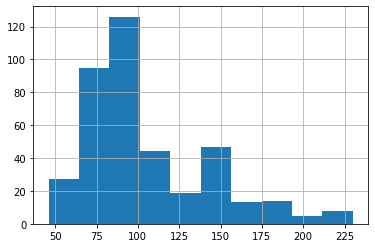

In [68]:
df.hp.hist()

In [69]:
import seaborn as sns

C:\Users\pokas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hp'>

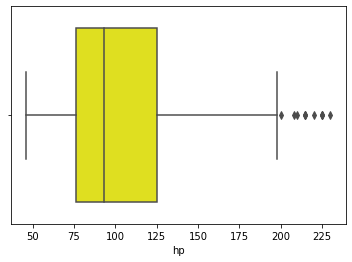

In [70]:
sns.boxplot(df.hp,color="yellow",orient="hp")

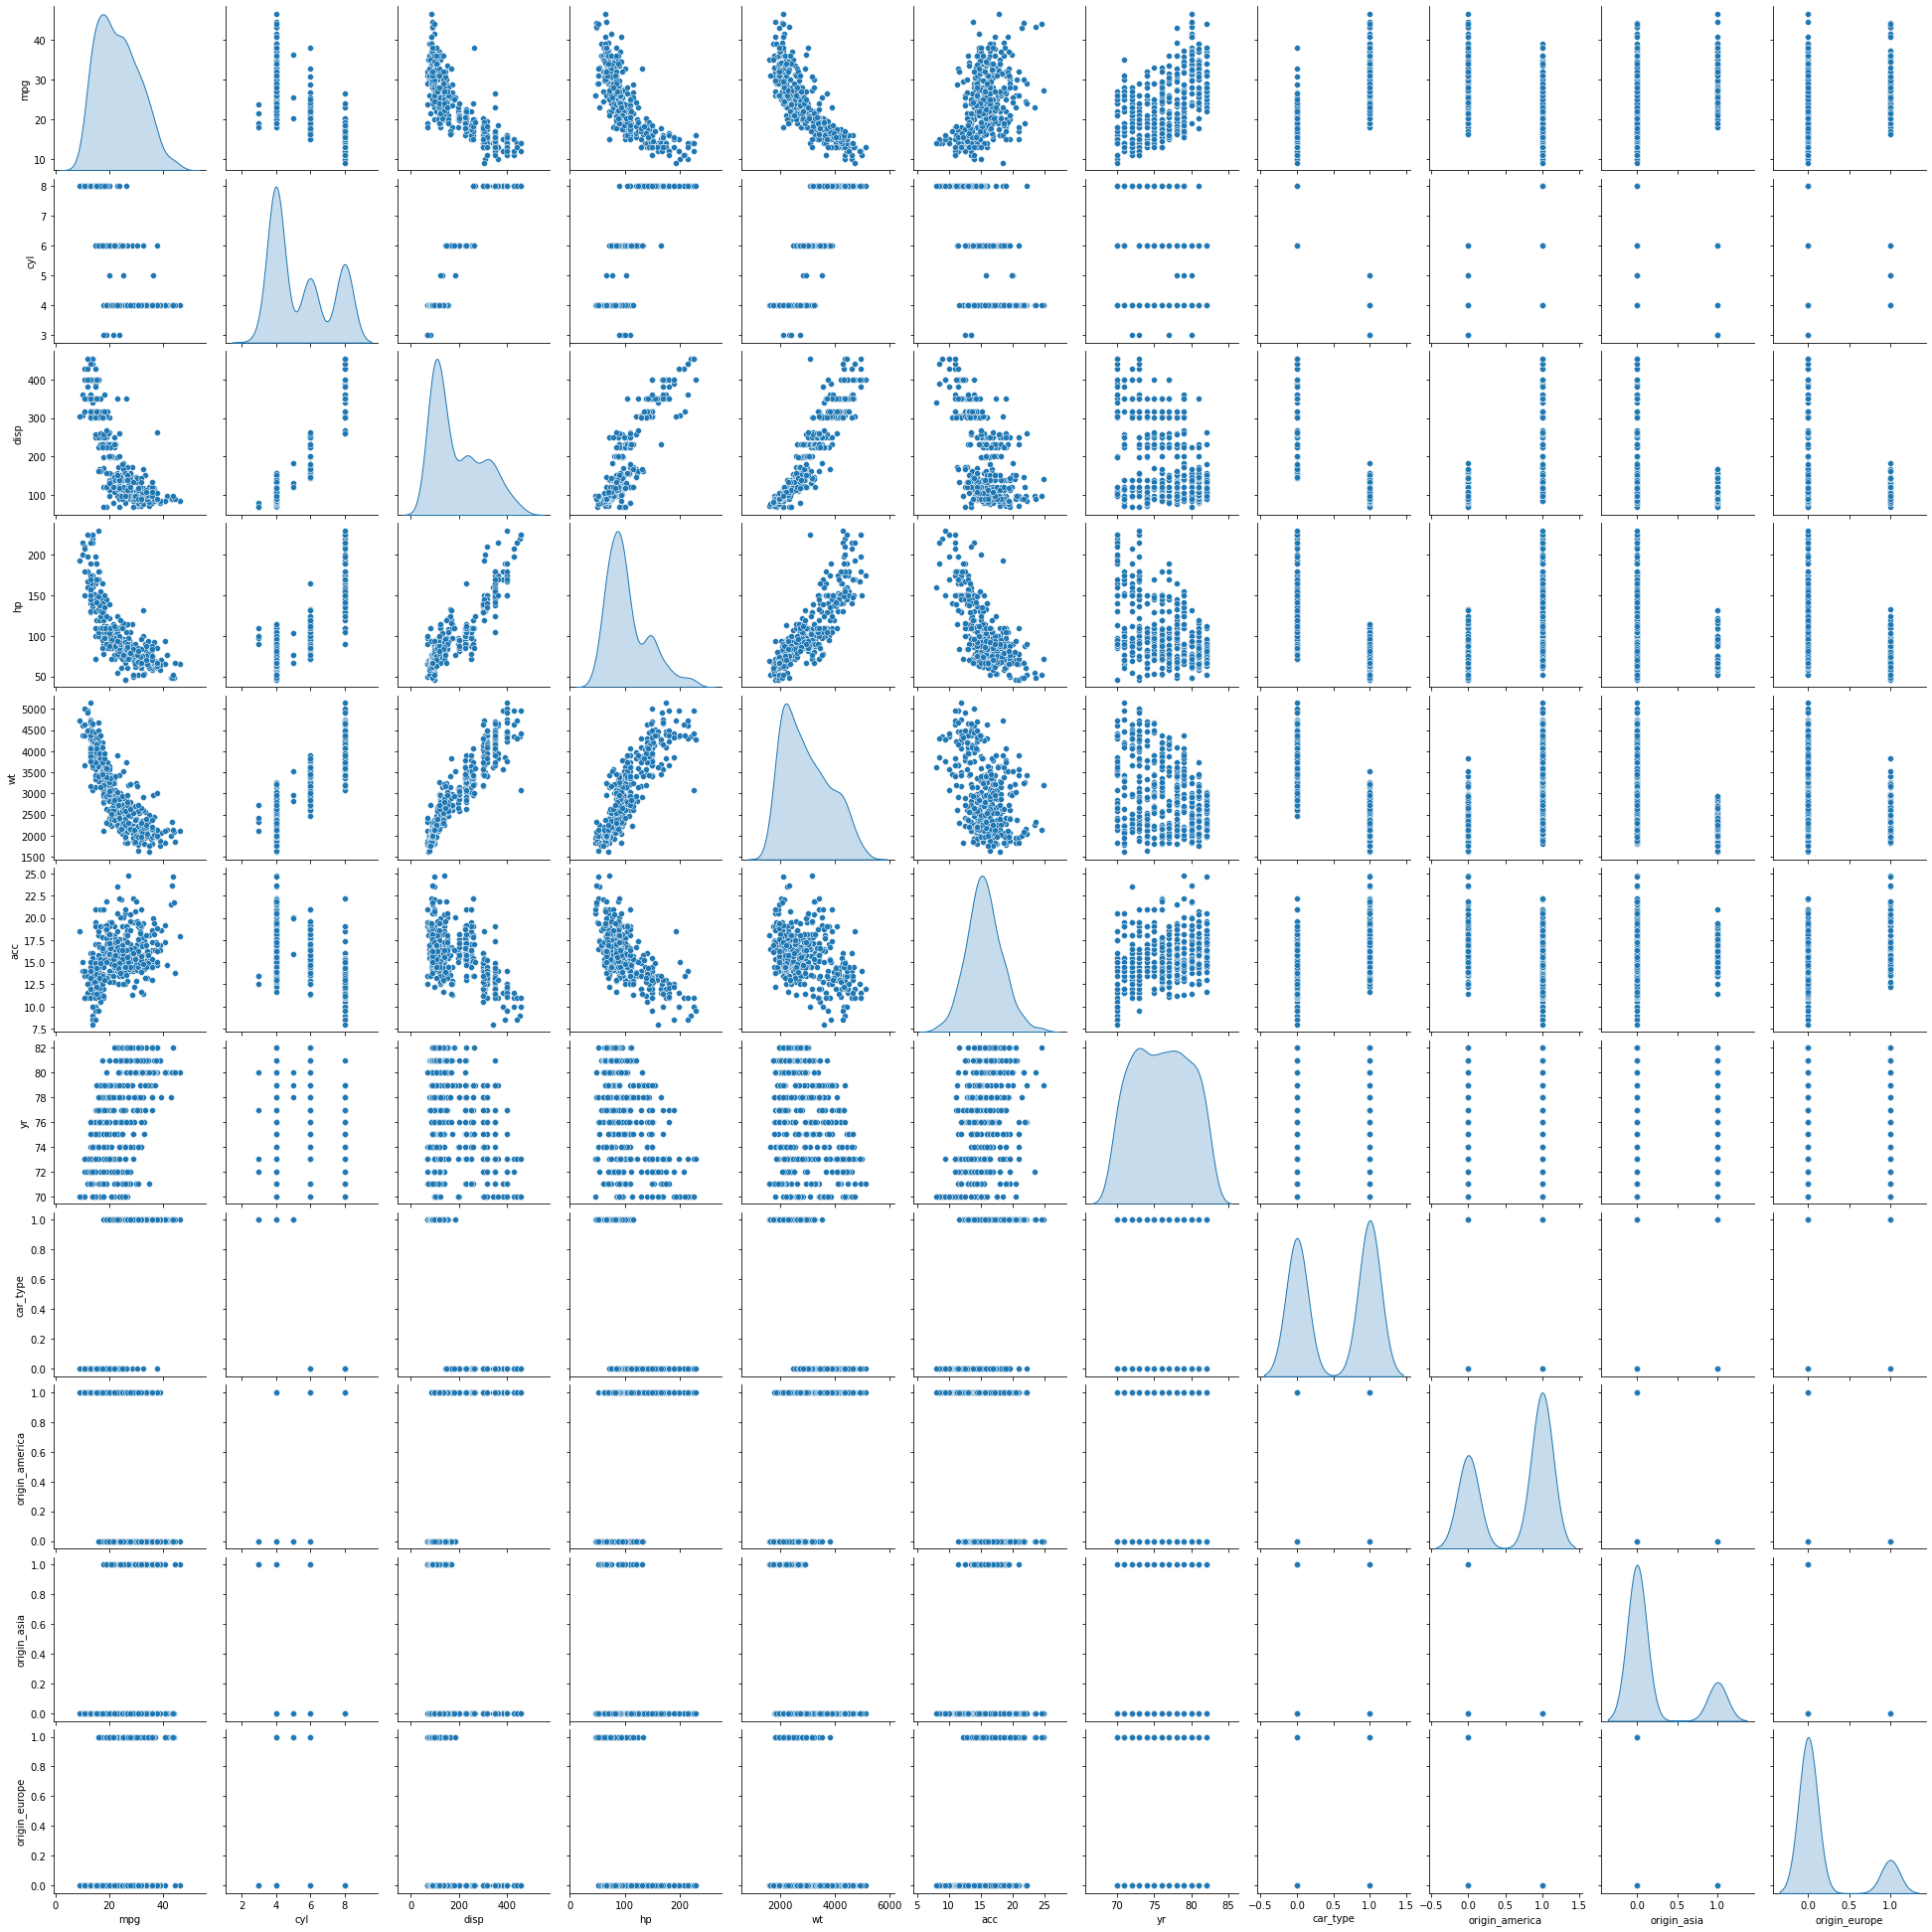

In [71]:
sns.pairplot(df,diag_kind="kde")

In [72]:
list(df)

['mpg',
 'cyl',
 'disp',
 'hp',
 'wt',
 'acc',
 'yr',
 'car_type',
 'origin_america',
 'origin_asia',
 'origin_europe']

In [73]:
target = "mpg"

In [74]:
x = df.drop(target,axis=1)
y = df[target]

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=100)

In [78]:
from sklearn.neighbors import KNeighborsRegressor

In [80]:
from sklearn import metrics

In [83]:
rmse =[]
for i in range(1,30):
    model = KNeighborsRegressor(n_neighbors=i,weights="uniform",metric="euclidean")
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    rmse.append(error)

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

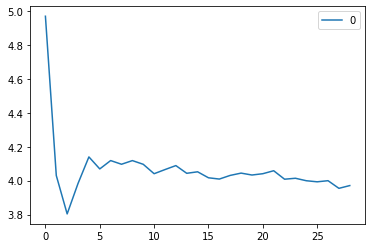

In [87]:
R = pd.DataFrame(rmse)
R.plot()

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param = {"n_neighbors":np.arange(1,30)}

In [108]:
model = KNeighborsRegressor()
grid = GridSearchCV(model,param,cv=5)

In [109]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [110]:
grid.best_params_

{'n_neighbors': 25}

In [111]:
model = KNeighborsRegressor(n_neighbors = 25)

In [112]:
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=25)

In [114]:
y_pred =model.predict(x_test)

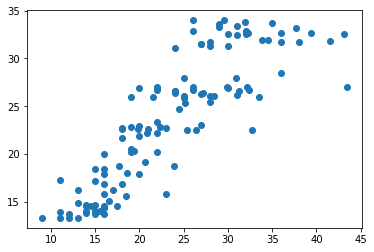

In [115]:
plt.scatter(y_test,y_pred)